# 0 Import & Load Data

## 0.1 Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joblib
import random

from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 0.2 Import Dataset

In [ ]:
df = pd.read_csv("laptop_price_dataset.csv")
df.head()


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [ ]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [ ]:
df.shape

(1275, 15)

In [ ]:
df.tail(10)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
1265,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel,Core i7 6700HQ,2.6,8,1TB HDD,Nvidia,GeForce GTX 960M,Windows 10,2.60,899.00
1266,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD,A9-Series 9410,2.9,6,1.0TB Hybrid,AMD,Radeon R7 M440,Windows 10,2.04,549.99
1267,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel,Core i7 7500U,2.7,8,1TB HDD,AMD,Radeon R5 M430,Linux,2.30,805.99
1268,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel,Celeron Dual Core N3060,1.6,2,32GB Flash Storage,Intel,HD Graphics 400,Windows 10,1.17,209.00
1269,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,4,500GB HDD,Nvidia,GeForce 920M,Windows 10,2.20,720.32
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel,Celeron Dual Core N3050,1.6,4,500GB HDD,Intel,HD Graphics,Windows 10,2.20,369.00


# 1.Exploratory Data Analysis (EDA)


## 1.1 Check  Null Values

In [ ]:
df.isnull()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1271,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1272,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1273,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
CPU_Company,0
CPU_Type,0
CPU_Frequency (GHz),0
RAM (GB),0
Memory,0


##1.2 Check Duplicate

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1270,False
1271,False
1272,False
1273,False


In [ ]:
df.duplicated().sum()

np.int64(0)

##1.3 Check Outlier

In [ ]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound


In [ ]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df[col])
    print(f"--- {col} ---")
    print(f"Jumlah outlier: {len(outliers)}")
    print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
    print()

--- Inches ---
Jumlah outlier: 37
Lower bound: 11.60, Upper bound: 18.00

--- CPU_Frequency (GHz) ---
Jumlah outlier: 2
Lower bound: 0.95, Upper bound: 3.75

--- RAM (GB) ---
Jumlah outlier: 219
Lower bound: -2.00, Upper bound: 14.00

--- Weight (kg) ---
Jumlah outlier: 45
Lower bound: 0.28, Upper bound: 3.53

--- Price (Euro) ---
Jumlah outlier: 28
Lower bound: -722.25, Upper bound: 2827.75



##1.4 Check Unique Value

In [ ]:
df["RAM (GB)"].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

In [ ]:
df["RAM (GB)"].value_counts()

,count
RAM (GB),
8,613
4,367
16,198
6,35
12,25
32,17
2,16
24,3
64,1


In [ ]:
df["CPU_Frequency (GHz)"].unique()


array([2.3 , 1.8 , 2.5 , 2.7 , 3.1 , 3.  , 2.2 , 1.6 , 2.  , 2.8 , 1.2 ,
       2.9 , 2.4 , 1.44, 1.5 , 1.9 , 1.1 , 1.3 , 2.6 , 3.6 , 3.2 , 1.  ,
       2.1 , 0.9 , 1.92])

In [ ]:
df["CPU_Frequency (GHz)"].value_counts()

,count
CPU_Frequency (GHz),
2.50,285
2.80,165
2.70,164
1.60,124
2.30,86
2.00,86
1.80,78
2.60,74
1.10,53


In [ ]:
df["Inches"].unique()


array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [ ]:
df["Inches"].value_counts()

,count
Inches,
15.6,647
14.0,193
17.3,164
13.3,160
12.5,39
11.6,31
13.5,6
12.0,6
13.9,6


In [ ]:
df["Weight (kg)"].unique()


array([1.37 , 1.34 , 1.86 , 1.83 , 2.1  , 2.04 , 1.3  , 1.6  , 2.2  ,
       0.92 , 1.22 , 0.98 , 2.5  , 1.62 , 1.91 , 2.3  , 1.35 , 1.88 ,
       1.89 , 1.65 , 2.71 , 1.2  , 1.44 , 2.8  , 2.   , 2.65 , 2.77 ,
       3.2  , 0.69 , 1.49 , 2.4  , 2.13 , 2.43 , 1.7  , 1.4  , 1.8  ,
       1.9  , 3.   , 1.252, 2.7  , 2.02 , 1.63 , 1.96 , 1.21 , 2.45 ,
       1.25 , 1.5  , 2.62 , 1.38 , 1.58 , 1.85 , 1.23 , 1.26 , 2.16 ,
       2.36 , 2.05 , 1.32 , 1.75 , 0.97 , 2.9  , 2.56 , 1.48 , 1.74 ,
       1.1  , 1.56 , 2.03 , 1.05 , 4.4  , 1.29 , 1.95 , 2.06 , 1.12 ,
       1.42 , 3.49 , 3.35 , 2.23 , 4.42 , 2.69 , 2.37 , 4.7  , 3.6  ,
       2.08 , 4.3  , 1.68 , 1.41 , 4.14 , 2.18 , 2.24 , 2.67 , 2.14 ,
       1.36 , 2.25 , 2.15 , 2.19 , 2.54 , 3.42 , 1.28 , 2.33 , 1.45 ,
       2.79 , 1.84 , 2.6  , 2.26 , 3.25 , 1.59 , 1.13 , 1.78 , 1.15 ,
       1.27 , 1.43 , 2.31 , 1.16 , 1.64 , 2.17 , 1.47 , 3.78 , 1.79 ,
       0.91 , 1.99 , 4.33 , 1.93 , 1.87 , 2.63 , 3.4  , 3.14 , 1.94 ,
       1.24 , 4.6  ,

In [ ]:
df["Weight (kg)"].value_counts()

,count
Weight (kg),
2.200,120
2.100,58
2.000,45
2.400,42
2.500,38
...,...
0.990,1
2.591,1
2.210,1


##1.5 Feature Distribution Analysis

###1.5.1 Numerical Analysis

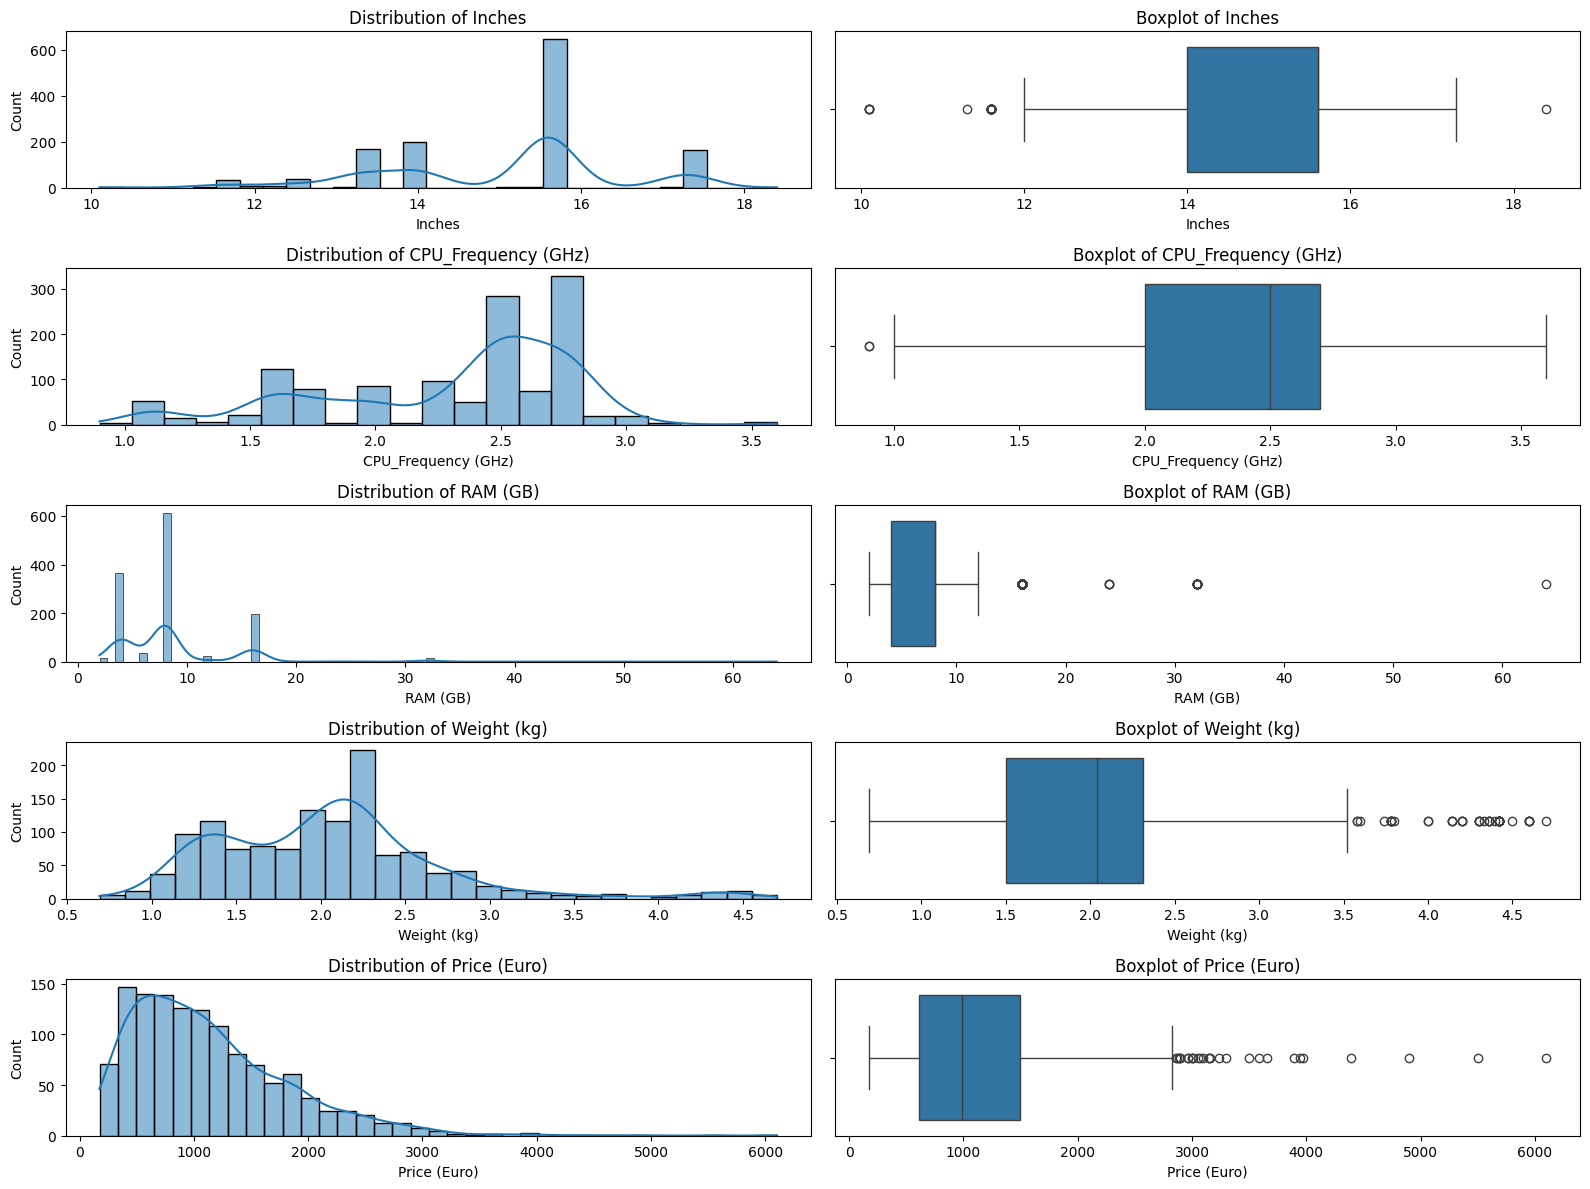

In [ ]:
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns

plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, 2*i-1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

    plt.subplot(len(numeric_cols), 2, 2*i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


###1.5.2 Categorical Analysis

<Figure size 1600x1000 with 0 Axes>

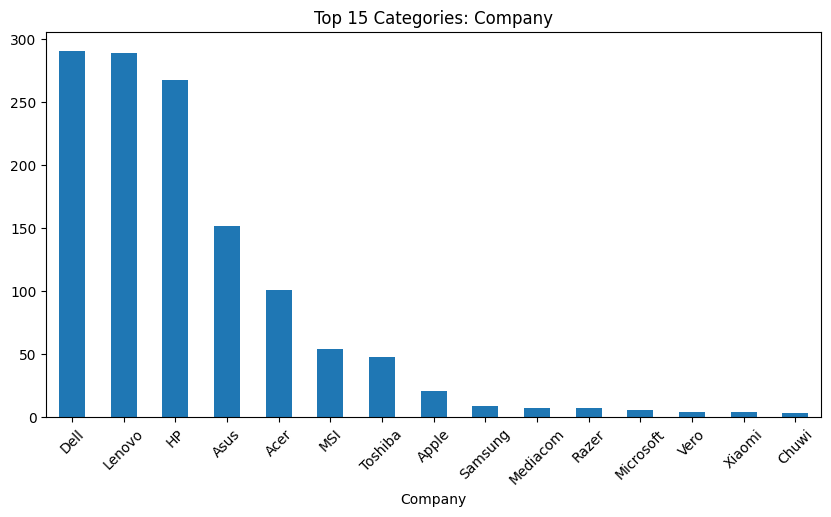

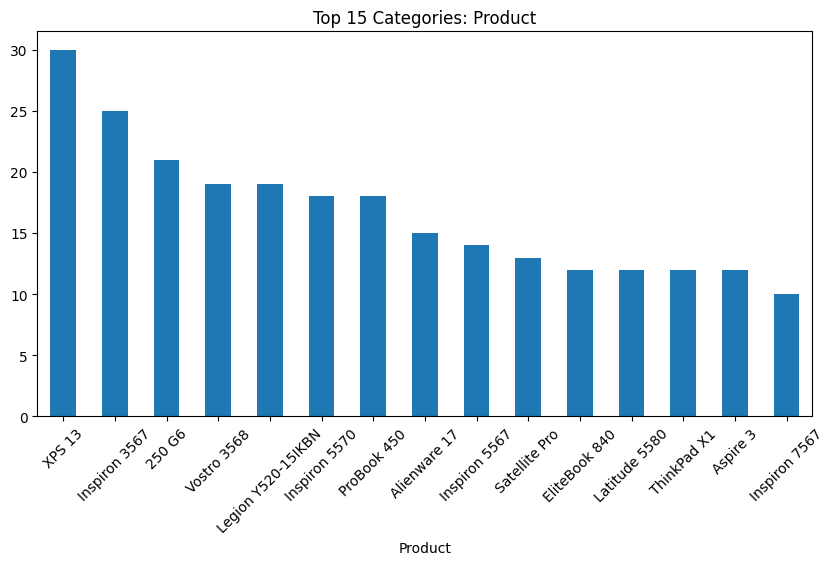

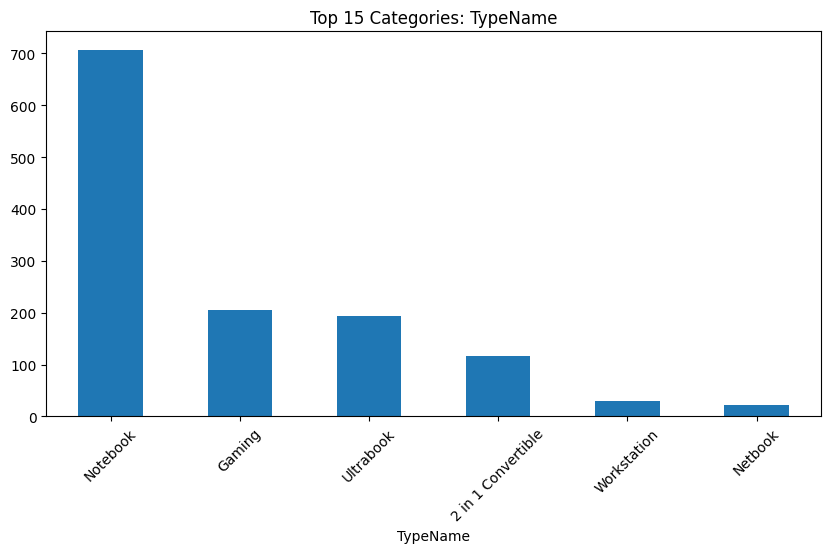

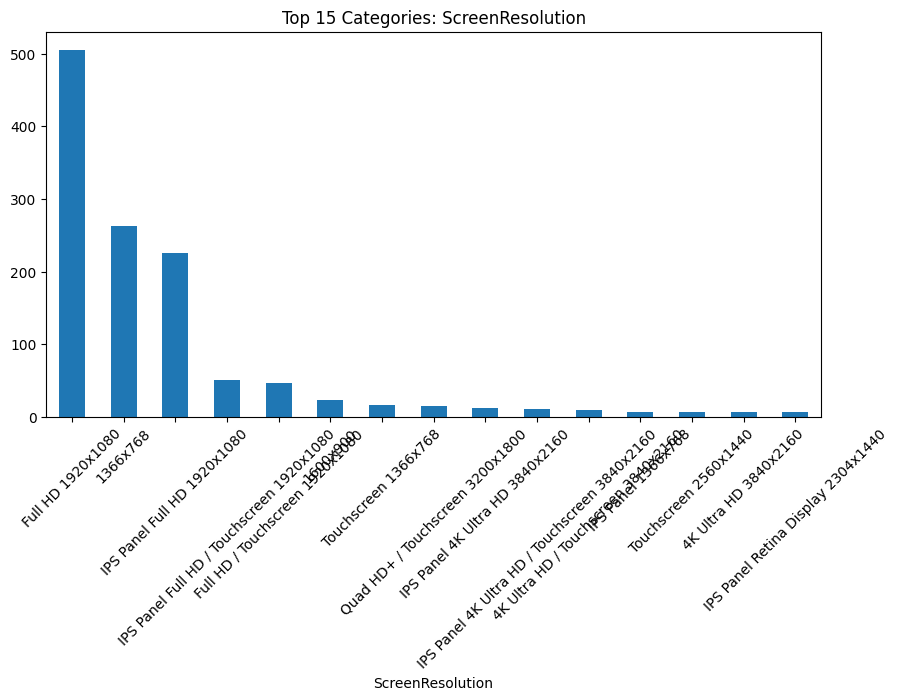

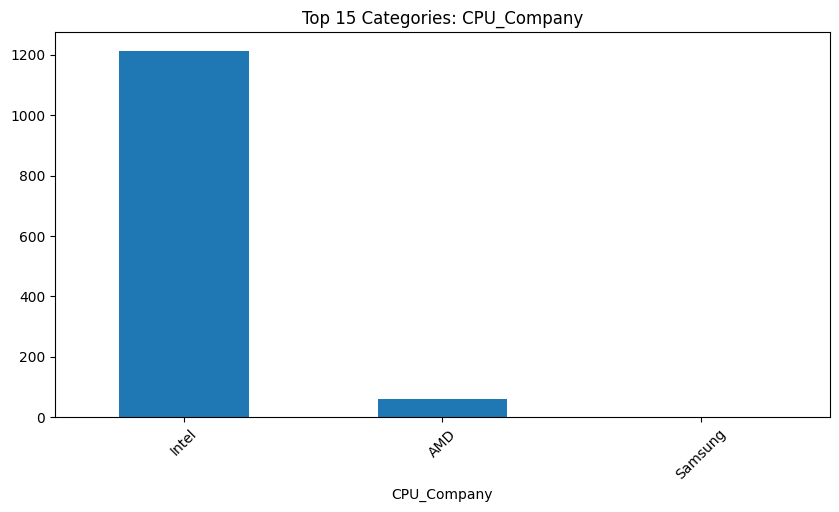

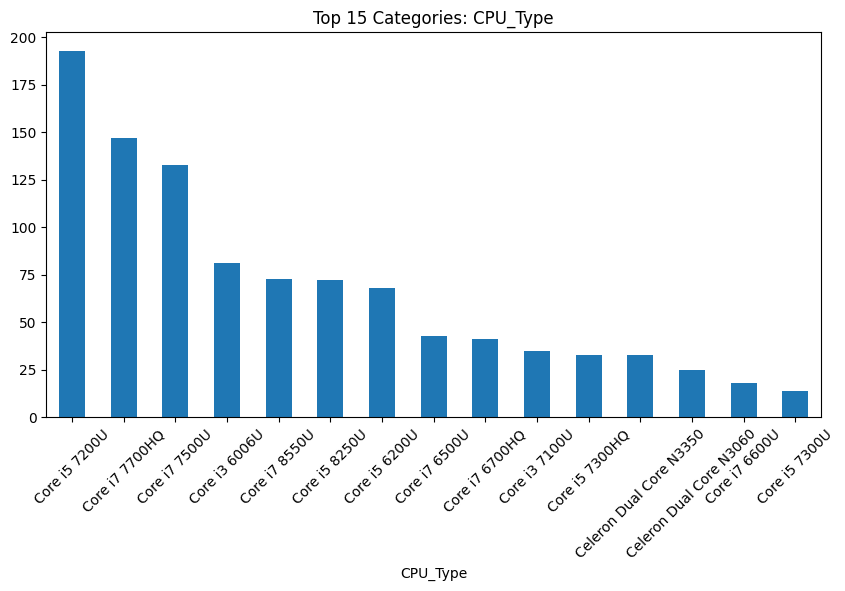

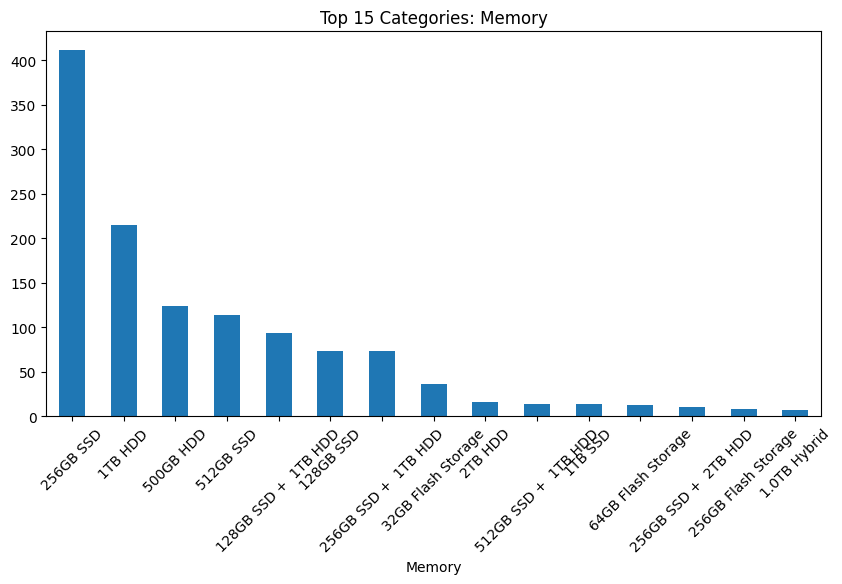

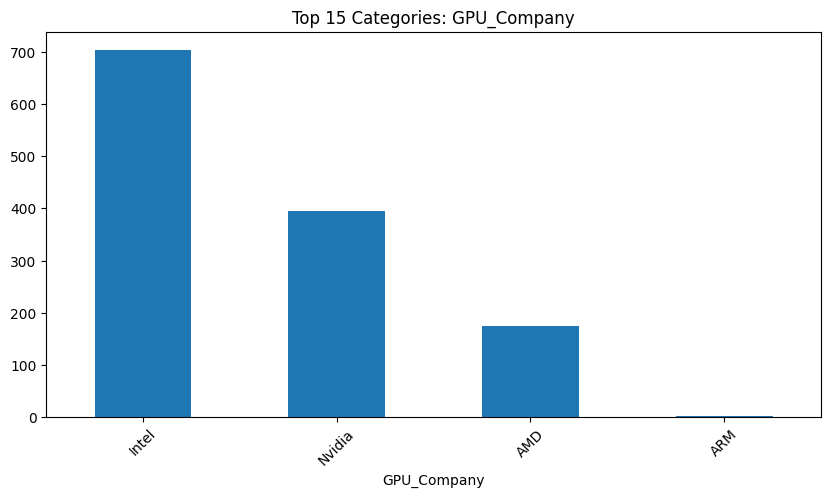

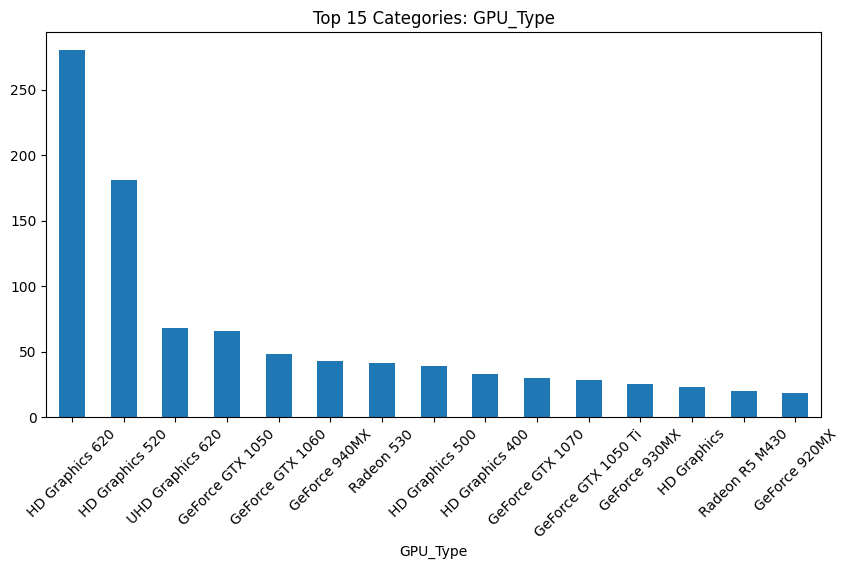

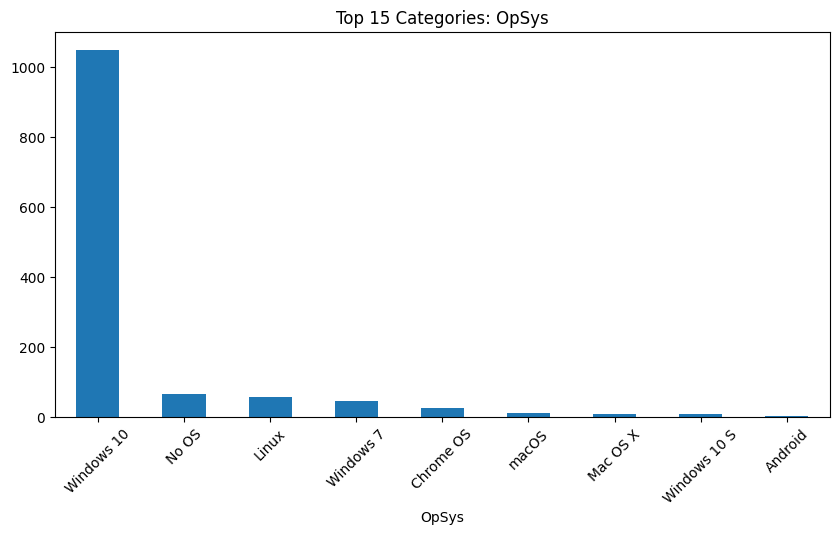

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(16, 10))

for col in categorical_cols:
    plt.figure(figsize=(10,5))

    # tampilkan hanya 15 kategori teratas
    df[col].value_counts().head(15).plot(kind='bar')

    plt.title(f"Top 15 Categories: {col}")
    plt.xticks(rotation=45)
    plt.show()



## 1.6 Correlation with Target

In [ ]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

In [ ]:
corr_matrix = df[numeric_cols].corr()
corr_matrix

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
Inches,1.000000,0.305037,0.241078,0.826638,0.066608
CPU_Frequency (GHz),0.305037,1.000000,0.366254,0.318649,0.428847
RAM (GB),0.241078,0.366254,1.000000,0.389370,0.740287
Weight (kg),0.826638,0.318649,0.389370,1.000000,0.211883
Price (Euro),0.066608,0.428847,0.740287,0.211883,1.000000


In [ ]:
corr_to_price = corr_matrix["Price (Euro)"].sort_values(ascending=False)
corr_to_price


,Price (Euro)
Price (Euro),1.000000
RAM (GB),0.740287
CPU_Frequency (GHz),0.428847
Weight (kg),0.211883
Inches,0.066608


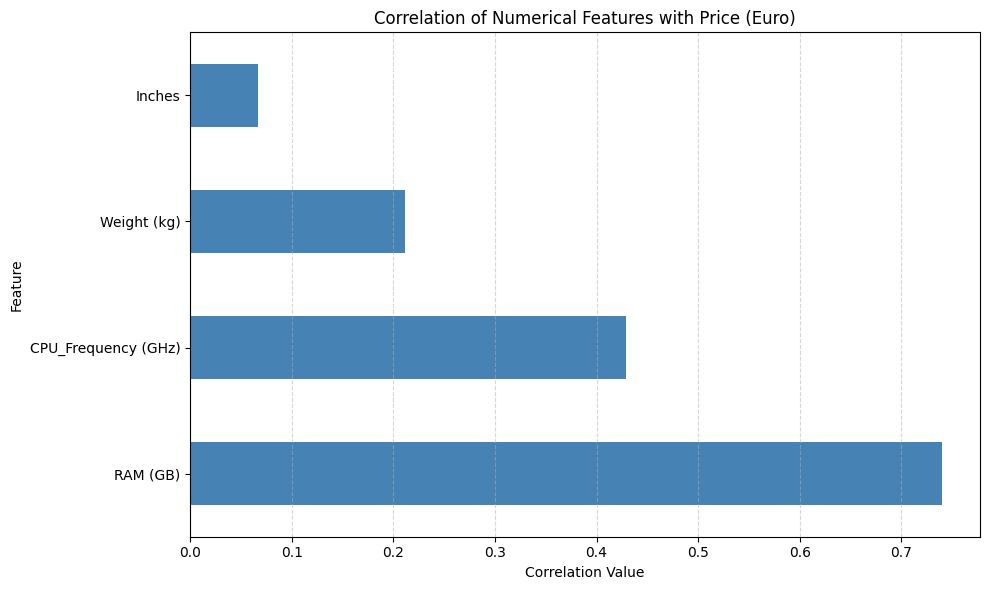

In [ ]:
plt.figure(figsize=(10,6))
corr_to_price.drop("Price (Euro)").plot(kind='barh', color='steelblue')
plt.title("Correlation of Numerical Features with Price (Euro)")
plt.xlabel("Correlation Value")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


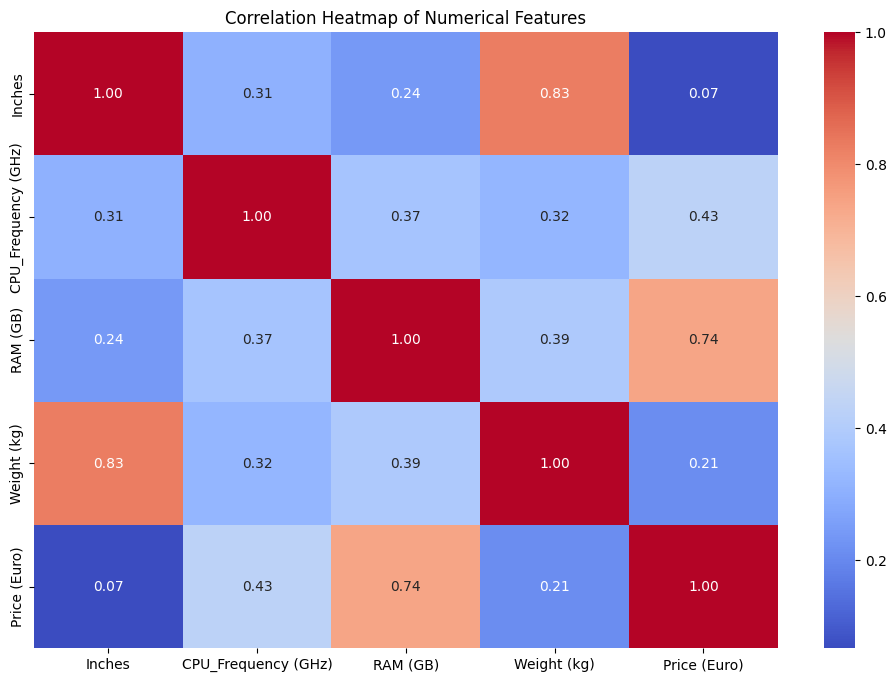

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


#2.Pre-Processing

## 2.1 Data Cleaning

### 2.1.1 Standardisasi string

In [ ]:
string_cols = ['Company', 'Product', 'TypeName', 'ScreenResolution', 'CPU_Company', 'CPU_Type',
               'Memory', 'GPU_Company', 'GPU_Type', 'OpSys']
for col in string_cols:
    df[col] = df[col].str.lower()


##2.2 Feature Engineering

### 2.2.1 FE Memory

In [ ]:
#=====================================================================
# Cleaning Memory (Ubah ke total GB, pisah SSD/HDD/Flash/Hybrid)
#=====================================================================

def clean_memory_all(value):
  text = value.lower()

  number = 0.0 # Initialize number
  storage_type = "Unknown" # Initialize storage_type

  num_match = re.search(r'(\d+)', text)
  if num_match:
    number = float(num_match.group(1))

  unit = "gb" if "gb" in text else "tb" if "tb" in text else None

  if number is not None and unit is not None:
    if unit == "tb":
      number = number * 1024

  if "ssd" in text:
    storage_type = "SSD"
  elif "hdd" in text:
    storage_type = "HDD"
  elif "flash" in text:
    storage_type = "Flash"
  elif "hybrid" in text:
    storage_type = "Hybrid"

  return pd.Series([number, storage_type])

In [ ]:
df[['total_storage_gb', 'storage_type']] = df['Memory'].apply(clean_memory_all)

In [ ]:
df[['total_storage_gb', 'storage_type']].head()

,total_storage_gb,storage_type
0,128.0,SSD
1,128.0,Flash
2,256.0,SSD
3,512.0,SSD
4,256.0,SSD


In [ ]:
df.dtypes

,0
Company,object
Product,object
TypeName,object
Inches,float64
ScreenResolution,object
CPU_Company,object
CPU_Type,object
CPU_Frequency (GHz),float64
RAM (GB),int64
Memory,object


In [ ]:
df.shape

(1275, 17)

### 2.2.2 FE ScreenResolution (Split width & height + Touchscreen)

In [ ]:
df['ScreenResolution'].unique()

array(['ips panel retina display 2560x1600', '1440x900',
       'full hd 1920x1080', 'ips panel retina display 2880x1800',
       '1366x768', 'ips panel full hd 1920x1080',
       'ips panel retina display 2304x1440',
       'ips panel full hd / touchscreen 1920x1080',
       'full hd / touchscreen 1920x1080',
       'touchscreen / quad hd+ 3200x1800',
       'ips panel touchscreen 1920x1200', 'touchscreen 2256x1504',
       'quad hd+ / touchscreen 3200x1800', 'ips panel 1366x768',
       'ips panel 4k ultra hd / touchscreen 3840x2160',
       'ips panel full hd 2160x1440',
       '4k ultra hd / touchscreen 3840x2160', 'touchscreen 2560x1440',
       '1600x900', 'ips panel 4k ultra hd 3840x2160',
       '4k ultra hd 3840x2160', 'touchscreen 1366x768',
       'ips panel full hd 1366x768', 'ips panel 2560x1440',
       'ips panel full hd 2560x1440',
       'ips panel retina display 2736x1824', 'touchscreen 2400x1600',
       '2560x1440', 'ips panel quad hd+ 2560x1440',
       'ips panel 

In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
full hd 1920x1080,505
1366x768,263
ips panel full hd 1920x1080,226
ips panel full hd / touchscreen 1920x1080,51
full hd / touchscreen 1920x1080,47
1600x900,23
touchscreen 1366x768,16
quad hd+ / touchscreen 3200x1800,15
ips panel 4k ultra hd 3840x2160,12


In [ ]:
def process_screen_resolution(df):
    df = df.copy()

    df['is_touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen', case=False).astype(int)

    df[['Screen_Width', 'Screen_Height']] = df['ScreenResolution'].str.extract(r'(\d+)[xX](\d+)', expand=True)

    df['Screen_Width'] = df['Screen_Width'].astype(int)
    df['Screen_Height'] = df['Screen_Height'].astype(int)

    df['screen_resolution_clean'] = (
        df['Screen_Width'].astype(str) + 'x' + df['Screen_Height'].astype(str)
    )

    return df

In [ ]:
df = process_screen_resolution(df)

In [ ]:
df.shape

(1275, 21)

In [ ]:
print(df.columns)

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)',
       'total_storage_gb', 'storage_type', 'is_touchscreen', 'Screen_Width',
       'Screen_Height', 'screen_resolution_clean'],
      dtype='object')


In [ ]:
df.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,...,GPU_Type,OpSys,Weight (kg),Price (Euro),total_storage_gb,storage_type,is_touchscreen,Screen_Width,Screen_Height,screen_resolution_clean
0,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel,core i5,2.3,8,128gb ssd,...,iris plus graphics 640,macos,1.37,1339.69,128.0,SSD,0,2560,1600,2560x1600
1,apple,macbook air,ultrabook,13.3,1440x900,intel,core i5,1.8,8,128gb flash storage,...,hd graphics 6000,macos,1.34,898.94,128.0,Flash,0,1440,900,1440x900
2,hp,250 g6,notebook,15.6,full hd 1920x1080,intel,core i5 7200u,2.5,8,256gb ssd,...,hd graphics 620,no os,1.86,575.00,256.0,SSD,0,1920,1080,1920x1080


In [ ]:
df['Memory'].value_counts()

,count
Memory,
256gb ssd,412
1tb hdd,215
500gb hdd,124
512gb ssd,114
128gb ssd + 1tb hdd,94
128gb ssd,74
256gb ssd + 1tb hdd,73
32gb flash storage,36
2tb hdd,16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1275 non-null   object 
 1   Product                  1275 non-null   object 
 2   TypeName                 1275 non-null   object 
 3   Inches                   1275 non-null   float64
 4   ScreenResolution         1275 non-null   object 
 5   CPU_Company              1275 non-null   object 
 6   CPU_Type                 1275 non-null   object 
 7   CPU_Frequency (GHz)      1275 non-null   float64
 8   RAM (GB)                 1275 non-null   int64  
 9   Memory                   1275 non-null   object 
 10  GPU_Company              1275 non-null   object 
 11  GPU_Type                 1275 non-null   object 
 12  OpSys                    1275 non-null   object 
 13  Weight (kg)              1275 non-null   float64
 14  Price (Euro)            

### 2.2.3 FE CPU_Type

In [ ]:
df['CPU_Type'].unique()

array(['core i5', 'core i5 7200u', 'core i7', 'a9-series 9420',
       'core i7 8550u', 'core i5 8250u', 'core i3 6006u', 'core m m3',
       'core i7 7500u', 'core i3 7100u', 'atom x5-z8350',
       'core i5 7300hq', 'e-series e2-9000e', 'core i7 8650u',
       'atom x5-z8300', 'e-series e2-6110', 'a6-series 9220',
       'celeron dual core n3350', 'core i3 7130u', 'core i7 7700hq',
       'ryzen 1700', 'pentium quad core n4200', 'atom x5-z8550',
       'celeron dual core n3060', 'fx 9830p', 'core i7 7560u',
       'e-series 6110', 'core i5 6200u', 'core m 6y75', 'core i5 7500u',
       'core i7 6920hq', 'core i5 7y54', 'core i7 7820hk',
       'xeon e3-1505m v6', 'core i7 6500u', 'e-series 9000e',
       'a10-series a10-9620p', 'a6-series a6-9220', 'core i7 6600u',
       'celeron dual core 3205u', 'core i7 7820hq', 'a10-series 9600p',
       'core i7 7600u', 'a8-series 7410', 'celeron dual core 3855u',
       'pentium quad core n3710', 'a12-series 9720p', 'core i5 7300u',
       'ce

In [ ]:
df['CPU_Type'].value_counts()

,count
CPU_Type,
core i5 7200u,193
core i7 7700hq,147
core i7 7500u,133
core i3 6006u,81
core i7 8550u,73
...,...
core m 6y54,1
cortex a72&a53,1
e-series 9000,1


In [ ]:
def extract_cpu_details(cpu):
    text = cpu.lower()
    #==========================
    # 1) CPU Family
    #==========================
    if "core" in text:
        family = "Core"
    elif "pentium dual core" in text:
        family = "Pentium Dual Core"
    elif "pentium" in text:
        family = "Pentium"
    elif "ryzen" in text:
        family = "Ryzen"
    elif "fx" in text:
        family = "FX"
    elif "cortex" in text:
        family = "Cortex"
    else:
        family = "Others"

    #============================
    # 2) CPU Gen family
    #============================
    gen_family = "Others" # Initialize with a default value
    # Intel Core i3/i5/i7/i9
    match = re.search(r'i[3-9]', text)
    if match:
        gen_family = match.group(0).upper()
    #Ryzen 3/5/7/9
    elif "ryzen" in text:
        match = re.search(r'ryzen\s*\d', text)
        gen_family = match.group(0).title() if match else "Ryzen"
    # FX
    elif "fx" in text:
        gen_family = "FX"
    # Cortex A72 / A53
    elif "cortex" in text:
        match = re.search(r'a\d+', text)
        gen_family = match.group(0).upper() if match else "Cortex"


    return family, gen_family

In [ ]:
df[['cpu_family', 'cpu_gen_family']] = df['CPU_Type'].apply(lambda x:
pd.Series(extract_cpu_details(x)))

In [ ]:
df[['cpu_family', 'cpu_gen_family']].head(5)

,cpu_family,cpu_gen_family
0,Core,I5
1,Core,I5
2,Core,I5
3,Core,I7
4,Core,I5


In [ ]:
df.tail(3)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,...,Weight (kg),Price (Euro),total_storage_gb,storage_type,is_touchscreen,Screen_Width,Screen_Height,screen_resolution_clean,cpu_family,cpu_gen_family
1272,lenovo,ideapad 100s-14ibr,notebook,14.0,1366x768,intel,celeron dual core n3050,1.6,2,64gb flash storage,...,1.50,229.0,64.0,Flash,0,1366,768,1366x768,Core,Others
1273,hp,15-ac110nv (i7-6500u/6gb/1tb/radeon,notebook,15.6,1366x768,intel,core i7 6500u,2.5,6,1tb hdd,...,2.19,764.0,1024.0,HDD,0,1366,768,1366x768,Core,I7
1274,asus,x553sa-xx031t (n3050/4gb/500gb/w10),notebook,15.6,1366x768,intel,celeron dual core n3050,1.6,4,500gb hdd,...,2.20,369.0,500.0,HDD,0,1366,768,1366x768,Core,Others


In [ ]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
CPU_Company,0
CPU_Type,0
CPU_Frequency (GHz),0
RAM (GB),0
Memory,0


In [ ]:
df['cpu_family'].unique()

array(['Core', 'Others', 'Ryzen', 'FX', 'Cortex'], dtype=object)

In [ ]:
df['cpu_gen_family'].unique()

array(['I5', 'I7', 'Others', 'I3', 'Ryzen 1', 'FX', 'A72'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1275 non-null   object 
 1   Product                  1275 non-null   object 
 2   TypeName                 1275 non-null   object 
 3   Inches                   1275 non-null   float64
 4   ScreenResolution         1275 non-null   object 
 5   CPU_Company              1275 non-null   object 
 6   CPU_Type                 1275 non-null   object 
 7   CPU_Frequency (GHz)      1275 non-null   float64
 8   RAM (GB)                 1275 non-null   int64  
 9   Memory                   1275 non-null   object 
 10  GPU_Company              1275 non-null   object 
 11  GPU_Type                 1275 non-null   object 
 12  OpSys                    1275 non-null   object 
 13  Weight (kg)              1275 non-null   float64
 14  Price (Euro)            

In [ ]:
df = df.drop(columns=['CPU_Type'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1275 non-null   object 
 1   Product                  1275 non-null   object 
 2   TypeName                 1275 non-null   object 
 3   Inches                   1275 non-null   float64
 4   ScreenResolution         1275 non-null   object 
 5   CPU_Company              1275 non-null   object 
 6   CPU_Frequency (GHz)      1275 non-null   float64
 7   RAM (GB)                 1275 non-null   int64  
 8   Memory                   1275 non-null   object 
 9   GPU_Company              1275 non-null   object 
 10  GPU_Type                 1275 non-null   object 
 11  OpSys                    1275 non-null   object 
 12  Weight (kg)              1275 non-null   float64
 13  Price (Euro)             1275 non-null   float64
 14  total_storage_gb        

### 2.2.4 FE GPU_Type

In [ ]:
df['GPU_Type'].value_counts()

,count
GPU_Type,
hd graphics 620,280
hd graphics 520,181
uhd graphics 620,68
geforce gtx 1050,66
geforce gtx 1060,48
...,...
quadro m500m,1
radeon r7 m360,1
quadro m3000m,1


In [ ]:
df.tail(3)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,...,Weight (kg),Price (Euro),total_storage_gb,storage_type,is_touchscreen,Screen_Width,Screen_Height,screen_resolution_clean,cpu_family,cpu_gen_family
1272,lenovo,ideapad 100s-14ibr,notebook,14.0,1366x768,intel,1.6,2,64gb flash storage,intel,...,1.50,229.0,64.0,Flash,0,1366,768,1366x768,Core,Others
1273,hp,15-ac110nv (i7-6500u/6gb/1tb/radeon,notebook,15.6,1366x768,intel,2.5,6,1tb hdd,amd,...,2.19,764.0,1024.0,HDD,0,1366,768,1366x768,Core,I7
1274,asus,x553sa-xx031t (n3050/4gb/500gb/w10),notebook,15.6,1366x768,intel,1.6,4,500gb hdd,intel,...,2.20,369.0,500.0,HDD,0,1366,768,1366x768,Core,Others


In [ ]:
df['GPU_Family'] = df['GPU_Type'].apply(lambda x: x.split()[0])

In [ ]:
def extract_gpu_number(x):
    numbers = re.findall(r'\d+', x)
    return int(numbers[0]) if numbers else None

df['GPU_Model_Number'] = df['GPU_Type'].apply(extract_gpu_number)

In [ ]:
df['GPU_Model_Number'].unique()

array([6.40e+02, 6.00e+03, 6.20e+02, 4.55e+02, 6.50e+02, 5.00e+00,
            nan, 1.50e+02, 5.20e+02, 5.55e+02, 6.15e+02, 5.60e+02,
       9.40e+02, 4.00e+02, 1.05e+03, 2.00e+00, 5.30e+02, 9.30e+02,
       5.00e+02, 1.06e+03, 5.40e+02, 5.80e+02, 9.20e+02, 4.00e+00,
       1.07e+03, 1.30e+02, 7.00e+00, 5.50e+02, 5.15e+02, 5.05e+02,
       9.80e+02, 1.70e+01, 1.08e+03, 1.20e+03, 9.50e+02, 4.19e+03,
       6.30e+02, 5.10e+02, 4.05e+02, 5.13e+03, 2.20e+03, 9.65e+02,
       9.60e+02, 9.70e+02, 2.00e+03, 1.00e+03, 5.30e+03, 3.00e+00,
       9.00e+00, 3.00e+03, 6.15e+03, 8.60e+02])

In [ ]:
df[['GPU_Company', 'GPU_Family', 'GPU_Model_Number']].head()

,GPU_Company,GPU_Family,GPU_Model_Number
0,intel,iris,640.0
1,intel,hd,6000.0
2,intel,hd,620.0
3,amd,radeon,455.0
4,intel,iris,650.0


In [ ]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
CPU_Company,0
CPU_Frequency (GHz),0
RAM (GB),0
Memory,0
GPU_Company,0


In [ ]:
df['GPU_Model_Number'] = df['GPU_Model_Number'].fillna(0)

In [ ]:
df[['GPU_Company', 'GPU_Family', 'GPU_Model_Number']].head()


,GPU_Company,GPU_Family,GPU_Model_Number
0,intel,iris,640.0
1,intel,hd,6000.0
2,intel,hd,620.0
3,amd,radeon,455.0
4,intel,iris,650.0


In [ ]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
CPU_Company,0
CPU_Frequency (GHz),0
RAM (GB),0
Memory,0
GPU_Company,0


In [ ]:
df['GPU_Family'].unique()

array(['iris', 'hd', 'radeon', 'geforce', 'uhd', 'r4', 'gtx',
       'r17m-m1-70', 'quadro', 'firepro', 'graphics', 'mali'],
      dtype=object)

In [ ]:
df['gpu_family'] = df['GPU_Family'].str.lower()
df = df.drop(columns=['GPU_Family'])

In [ ]:
df['gpu_family'].unique()

array(['iris', 'hd', 'radeon', 'geforce', 'uhd', 'r4', 'gtx',
       'r17m-m1-70', 'quadro', 'firepro', 'graphics', 'mali'],
      dtype=object)

In [ ]:
df['GPU_Company'].unique()

array(['intel', 'amd', 'nvidia', 'arm'], dtype=object)

In [ ]:
df = df.drop(columns=['GPU_Model_Number', 'GPU_Type'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1275 non-null   object 
 1   Product                  1275 non-null   object 
 2   TypeName                 1275 non-null   object 
 3   Inches                   1275 non-null   float64
 4   ScreenResolution         1275 non-null   object 
 5   CPU_Company              1275 non-null   object 
 6   CPU_Frequency (GHz)      1275 non-null   float64
 7   RAM (GB)                 1275 non-null   int64  
 8   Memory                   1275 non-null   object 
 9   GPU_Company              1275 non-null   object 
 10  OpSys                    1275 non-null   object 
 11  Weight (kg)              1275 non-null   float64
 12  Price (Euro)             1275 non-null   float64
 13  total_storage_gb         1275 non-null   float64
 14  storage_type            

###2.2.5 Correlation After Feature Engineering

In [ ]:
df = df.drop(['Product', 'ScreenResolution', 'Memory', 'screen_resolution_clean'], axis=1)

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64', 'bool']).columns
df_numeric = df[numerical_cols]
corr_to_price = df_numeric.corr()['Price (Euro)'].sort_values(ascending=False)
corr_to_price

,Price (Euro)
Price (Euro),1.000000
RAM (GB),0.740287
Screen_Width,0.552491
Screen_Height,0.548529
CPU_Frequency (GHz),0.428847
Weight (kg),0.211883
is_touchscreen,0.188886
Inches,0.066608
total_storage_gb,-0.124775


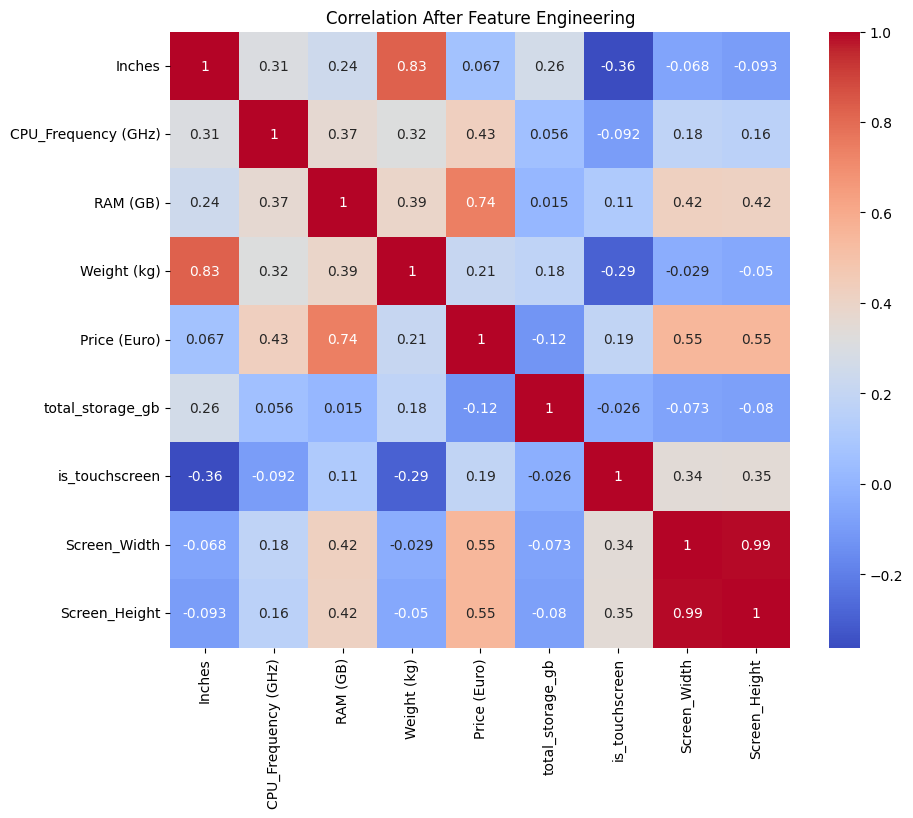

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation After Feature Engineering")
plt.show()


## 2.3 Split Data

### 2.3.1 Features & Target

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   TypeName             1275 non-null   object 
 2   Inches               1275 non-null   float64
 3   CPU_Company          1275 non-null   object 
 4   CPU_Frequency (GHz)  1275 non-null   float64
 5   RAM (GB)             1275 non-null   int64  
 6   GPU_Company          1275 non-null   object 
 7   OpSys                1275 non-null   object 
 8   Weight (kg)          1275 non-null   float64
 9   Price (Euro)         1275 non-null   float64
 10  total_storage_gb     1275 non-null   float64
 11  storage_type         1275 non-null   object 
 12  is_touchscreen       1275 non-null   int64  
 13  Screen_Width         1275 non-null   int64  
 14  Screen_Height        1275 non-null   int64  
 15  cpu_family           1275 non-null   o

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
X = df.drop('price (euro)', axis=1)
y = df['price (euro)']

### 2.3.2 Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1020, 17)

##2.4 Encoding + Scaling

### 2.4.1 Define Category & Encoding Strategy

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['company', 'typename', 'cpu_company', 'gpu_company', 'opsys',
       'storage_type', 'cpu_family', 'cpu_gen_family', 'gpu_family'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1275 non-null   object 
 1   typename             1275 non-null   object 
 2   inches               1275 non-null   float64
 3   cpu_company          1275 non-null   object 
 4   cpu_frequency (ghz)  1275 non-null   float64
 5   ram (gb)             1275 non-null   int64  
 6   gpu_company          1275 non-null   object 
 7   opsys                1275 non-null   object 
 8   weight (kg)          1275 non-null   float64
 9   price (euro)         1275 non-null   float64
 10  total_storage_gb     1275 non-null   float64
 11  storage_type         1275 non-null   object 
 12  is_touchscreen       1275 non-null   int64  
 13  screen_width         1275 non-null   int64  
 14  screen_height        1275 non-null   int64  
 15  cpu_family           1275 non-null   o

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['company', 'typename', 'cpu_company', 'gpu_company', 'opsys',
       'storage_type', 'cpu_family', 'cpu_gen_family', 'gpu_family'],
      dtype='object')

In [ ]:
ordinal_categories = {
    'cpu_family': ['Cortex', 'Others', 'FX', 'Core', 'Ryzen'],
    'cpu_gen_family': ['A72', 'FX', 'Others', 'I3', 'I5', 'I7',
                       'Ryzen 1'],
    'gpu_family': [
    'mali', 'r4', 'hd', 'uhd', 'iris', 'graphics',
    'radeon', 'geforce', 'gtx', 'firepro', 'quadro', 'r17m-m1-70']
}

ordinal_cols = list(ordinal_categories.keys())

onehot_cols = [
    'company',
    'typename',
    'cpu_company',
    'gpu_company',
    'opsys',
    'storage_type'
]

numeric_cols = [
    'inches',
    'cpu_frequency (ghz)',
    'ram (gb)',
    'weight (kg)',
    'total_storage_gb',
    'is_touchscreen',
    'screen_width',
    'screen_height'
]

### 2.4.2 Define Encoder & ColumnTransformer

In [ ]:
ordinal_encoder = OrdinalEncoder(
    categories=list(ordinal_categories.values()),
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

In [ ]:
preprocessor_tree = ColumnTransformer(
    transformers=[
        ("ord",
         OrdinalEncoder(categories=list(ordinal_categories.values())),
         ordinal_cols),

        ("cat",
         OneHotEncoder(handle_unknown='ignore', drop='first'),
         onehot_cols),

        ("num", "passthrough", numeric_cols)
    ]
)

In [ ]:
preprocessor_linear = ColumnTransformer(
    transformers=[
        ("ord",
         OrdinalEncoder(categories=list(ordinal_categories.values())),
         ordinal_cols),

        ("cat",
         OneHotEncoder(handle_unknown='ignore', drop='first'),
         onehot_cols),

        ("num",
         RobustScaler(),
         numeric_cols)
    ]
)

### 2.4.3 Fit & Transform Encoder + Scaler

In [ ]:
X_train_tree = preprocessor_tree.fit_transform(X_train)
X_test_tree = preprocessor_tree.transform(X_test)

In [ ]:
X_train_linear = preprocessor_linear.fit_transform(X_train)
X_test_linear = preprocessor_linear.transform(X_test)

# 3.Modeling

In [ ]:
def test_model(model, X_train, y_train=y_train):
    cv = KFold(n_splits=5, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    return scores.mean(), scores.std()

## 3.1 Model Selection

In [ ]:
# Initialize Models
lr     = LinearRegression()
lasso  = Lasso(alpha=1.0)
ridge  = Ridge(alpha=1.0)
rf     = RandomForestRegressor(n_estimators=400, random_state=42)
gbr    = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)

In [ ]:
xgb = XGBRegressor(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=6,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=0.1,
    reg_lambda=1.2,
    gamma=0.1,
    objective="reg:squarederror",
    random_state=42
)

### 3.1.1 Linear Model

In [ ]:
# Evaluate via KFold
model_list_linear = {
    "Linear Regression": lr,
    "Lasso Regression": lasso,
    "Ridge Regression": ridge,
}

results_linear = []

for name, model in model_list_linear.items():
    mean_cv, std_cv = test_model(model, X_train_linear)
    results_linear.append({"Model": name, "CV_R2_Mean": mean_cv, "CV_R2_Std": std_cv})

results_linear_cv = pd.DataFrame(results_linear)
display(results_linear_cv)

,Model,CV_R2_Mean,CV_R2_Std
0,Linear Regression,0.758764,0.019790
1,Lasso Regression,0.757723,0.019200
2,Ridge Regression,0.761919,0.017887


### 3.1.2 Tree Model

In [ ]:
# Evaluate via KFold
model_list_tree = {
    "Random Forest": rf,
    "Gradient Boosting": gbr,
    "XGBoost": xgb
}

results_tree = []

for name, model in model_list_tree.items():
    mean_cv, std_cv = test_model(model, X_train_tree)
    results_tree.append({"Model": name, "CV_R2_Mean": mean_cv, "CV_R2_Std": std_cv})

results_tree_cv = pd.DataFrame(results_tree)
display(results_tree_cv)

,Model,CV_R2_Mean,CV_R2_Std
0,Random Forest,0.809124,0.033480
1,Gradient Boosting,0.822068,0.021565
2,XGBoost,0.838349,0.014490


## 3.2 Hyperparameter Tuning

In [ ]:
param_dist = {
    "n_estimators": [200, 400, 600, 800, 1200],
    "max_depth": [3, 4, 5, 6, 7, 8],
    "learning_rate": [0.005, 0.01, 0.02, 0.03, 0.05],
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "min_child_weight": [1, 2, 3, 4, 5, 6, 10],
    "gamma": [0, 0.05, 0.1, 0.2, 0.3],
    "reg_alpha": [0, 0.01, 0.05, 0.1, 0.5, 1],
    "reg_lambda": [0.5, 1, 1.5, 2, 3],
}

rs_xgb = RandomizedSearchCV(
    estimator=XGBRegressor(objective="reg:squarederror", random_state=42),
    param_distributions=param_dist,
    n_iter=80,             # lebih dalam (40 → 80)
    scoring="r2",
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rs_xgb.fit(X_train_tree, y_train)

best_params = rs_xgb.best_params_
best_params

Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'subsample': 0.7,
 'reg_lambda': 1,
 'reg_alpha': 0.01,
 'n_estimators': 600,
 'min_child_weight': 4,
 'max_depth': 8,
 'learning_rate': 0.01,
 'gamma': 0.2,
 'colsample_bytree': 0.6}

## 3.3 Training Model

In [ ]:
# BEST MODEL
best_model = XGBRegressor(**best_params)
best_model.fit(X_train_tree, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.2, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=4, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgb.fit(X_train_tree, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=2, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=None, num_parallel_tree=None, ...)

#4.Evaluate

## 4.1 Model Evaluation

In [ ]:
cv_scores_best = cross_val_score(
    best_model,
    X_train_tree,
    y_train,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

cv_r2_mean = cv_scores_best.mean()
cv_r2_std  = cv_scores_best.std()

In [ ]:
def evaluate_model(model_name, y_true, y_pred):
    return {
        "Model": model_name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2 Test": r2_score(y_true, y_pred)
    }

In [ ]:
# Evaluate via KFold
model_list_tree = {
    "Random Forest": rf,
    "Gradient Boosting": gbr,
    "XGBoost": xgb
}

results_tree = []

for name, model in model_list_tree.items():
    mean_cv, std_cv = test_model(model, X_train_tree)
    results_tree.append({"Model": name, "CV_R2_Mean": mean_cv, "CV_R2_Std": std_cv})

results_tree_cv = pd.DataFrame(results_tree)
display(results_tree_cv)

,Model,CV_R2_Mean,CV_R2_Std
0,Random Forest,0.809124,0.033480
1,Gradient Boosting,0.822068,0.021565
2,XGBoost,0.838349,0.014490


In [ ]:
xgb_pred = best_model.predict(X_test_tree)
xgb_test_metrics = evaluate_model("XGBoost Tuning", y_test, xgb_pred)
pd.DataFrame([xgb_test_metrics])

,Model,MAE,RMSE,R2 Test
0,XGBoost Tuning,168.576836,252.10869,0.871945


In [ ]:
xgb_pred_lama = xgb.predict(X_test_tree)
xgb_test_metrics_lama = evaluate_model("XGBoost Lama", y_test, xgb_pred_lama)
pd.DataFrame([xgb_test_metrics_lama])

,Model,MAE,RMSE,R2 Test
0,XGBoost Lama,161.378227,236.185654,0.88761


In [ ]:
compare_xgb = []
compare_xgb.append(xgb_test_metrics)
compare_xgb.append(xgb_test_metrics_lama)
pd.DataFrame(compare_xgb)

,Model,MAE,RMSE,R2 Test
0,XGBoost Tuning,168.576836,252.108690,0.871945
1,XGBoost Lama,161.378227,236.185654,0.887610


In [ ]:
print("\n=== Perbandingan ===")
print(f"CV Mean Awal: {results_tree_cv.loc[results_tree_cv["Model"]=="XGBoost", "CV_R2_Mean"].values[0]:.4f}")
print(f"CV Mean Baru: {cv_scores_best.mean():.4f}")

print(f"CV Std Awal: {results_tree_cv.loc[results_tree_cv["Model"]=="XGBoost", "CV_R2_Std"].values[0]:.4f}")
print(f"CV Std Baru: {cv_scores_best.std():.4f}")


=== Perbandingan ===
CV Mean Awal: 0.8383
CV Mean Baru: 0.8390
CV Std Awal: 0.0145
CV Std Baru: 0.0304


In [ ]:
# Train Final Performance
train_pred = xgb.predict(X_train_tree)
train_r2 = r2_score(y_train, train_pred)

# Test Performance
test_r2 = xgb_test_metrics["R2 Test"]

print("\n=== OVERFITTING CHECK ===")
print(f"Train R2 : {train_r2:.4f}")
print(f"CV R2    : {cv_r2_mean:.4f} (std={cv_r2_std:.4f})")
print(f"Test R2  : {test_r2:.4f}")

print("\n=== INTERPRETATION ===")

if train_r2 - cv_r2_mean > 0.10 and cv_r2_mean - test_r2 > 0.10:
    print("Model OVERFITTING")
elif train_r2 < 0.6 and cv_r2_mean < 0.6:
    print("Model UNDERFITTING")
elif abs(cv_r2_mean - test_r2) <= 0.05:
    print("Model GOOD FIT (CV ≈ Test)")
else:
    print("Model Good but slight generalization gap")


=== OVERFITTING CHECK ===
Train R2 : 0.9826
CV R2    : 0.8390 (std=0.0304)
Test R2  : 0.8719

=== INTERPRETATION ===
Model GOOD FIT (CV ≈ Test)


## 4.2 Predict Sample Rows

In [ ]:
i = random.randint(0, len(X_train)-1)

sample_raw = X_train.iloc[i].to_frame().T

sample_scaled = preprocessor_tree.transform(sample_raw)

predicted = xgb.predict(sample_scaled)
actual = y_train.iloc[i]

print("Actual Price   :", actual)
print("Predicted Price:", predicted)

Actual Price   : 919.0
Predicted Price: [914.6313]


In [ ]:
# predictions for the first 10 rows of the training set
preds = xgb.predict(X_train_tree[:20])

# comparation table
df_compare = pd.DataFrame({
    "Actual": y_train[:20].values,
    "Predicted": preds,
    "Error": y_train[:20].values - preds
})

df_compare

,Actual,Predicted,Error
0,789.01,896.601624,-107.591624
1,2899.00,2977.534668,-78.534668
2,867.00,772.373779,94.626221
3,599.90,648.700439,-48.800439
4,469.00,444.092712,24.907288
5,540.00,642.285889,-102.285889
6,239.00,250.859085,-11.859085
7,629.00,689.157349,-60.157349
8,1348.48,1340.352051,8.127949
9,349.00,333.019714,15.980286


# 5.Deployment

## 5.1 Build Final Pipeline

In [ ]:
final_pipeline = Pipeline([
    ('preprocess', preprocessor_tree),
    ('xgb', xgb)
])

## 5.2 Train Final Pipeline

In [ ]:
# Fit pipeline dengan training data
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Cortex',
                                                                              'Others',
                                                                              'FX',
                                                                              'Core',
                                                                              'Ryzen'],
                                                                             ['A72',
                                                                              'FX',
                                                                              'Others',
                                                                              'I3',
                                                                              'I5',
                                                                              'I7',
                                                                              'Ryzen '
                                                                              '1'],
                                                                             ['mali',
                                                                              'r4',
                                                                              'hd',
                                                                              'uhd',
                                                                              'iris',
                                                                              'graphics',
                                                                              'radeon',
                                                                              'geforce',
                                                                              'gtx',
                                                                              'firepro',
                                                                              'quadro',
                                                                              'r17m-m1-70']]),
                                                  ['cpu_family',
                                                   'cpu_gen_family',
                                                   'gpu_family']),
                                                 ('cat',
                                                  OneHotEncod...
                              feature_types=None, feature_weights=None,
                              gamma=0.1, grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.03,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None, min_child_weight=2,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=600,
                              n_jobs=None, num_parallel_tree=None, ...))])

## 5.3 Save Model to File (.pkl)

In [ ]:
# Simpan ke file
joblib.dump(final_pipeline, "model_final.pkl")

['model_final.pkl']